<a href="https://colab.research.google.com/github/hiba0903/DSA-Daily-Tasks/blob/main/DSA_DT_Preprocess_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing libraries

import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#load the data

df= pd.read_csv('/content/train_loan_preprocess.csv')

In [5]:
#get the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.drop(['Gender','Married'],axis=1,inplace=True)
df

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df['Dependents']=df['Dependents'].str.strip(".+-*/")
df

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
df.isnull().sum()

,0
Loan_ID,0
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50
Property_Area,0


In [10]:
null_columns = df.columns[df.isnull().any()].tolist()
null_columns

['Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

## ***Filling the null column***

In [11]:
for column in null_columns:
    if df[column].dtype in ['float64', 'int64']:  # If the column is numerical
        df[column].fillna(df[column].mean(),inplace=True)
    else:
        df[column].fillna(df[column].mode()[0],inplace=True)

## ***Checking whether the null has been handled***

In [12]:
df.isnull().sum()

,0
Loan_ID,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Property_Area,0


## ***Blox Plot for checking Outliers***

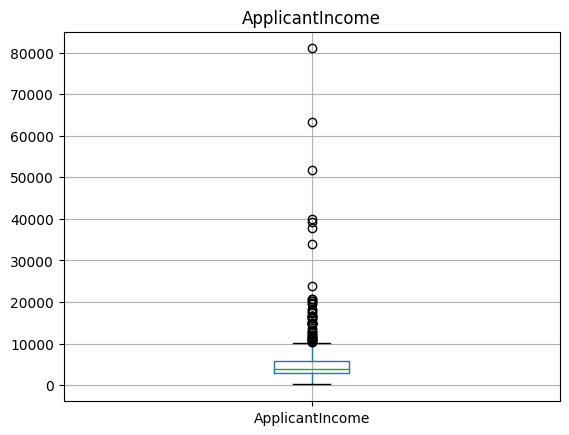

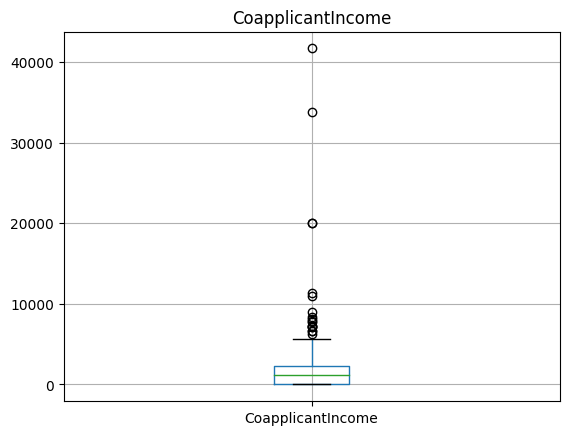

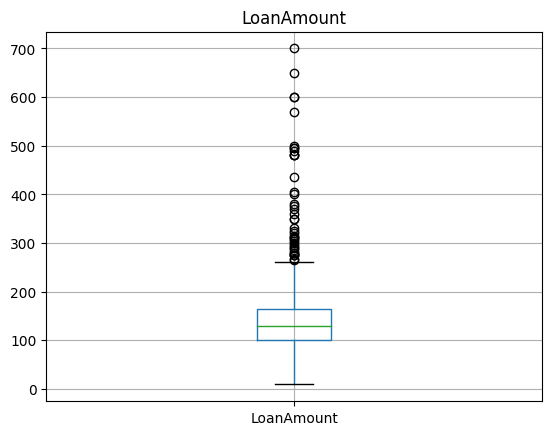

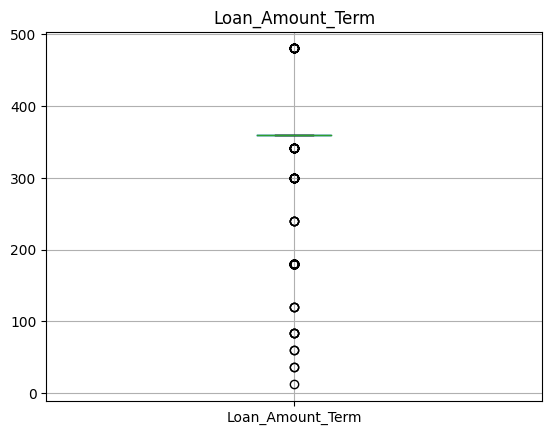

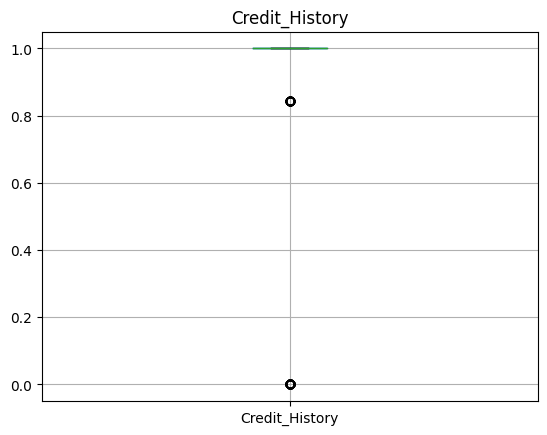

In [13]:
for column in df.select_dtypes(include=['number']):
  plt.figure()
  df.boxplot([column])
  plt.title(column)
  plt.show()


## ***Outlier Handling by IQR***

In [18]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers by keeping only the rows within bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


## ***Checking whether outlier is removed***

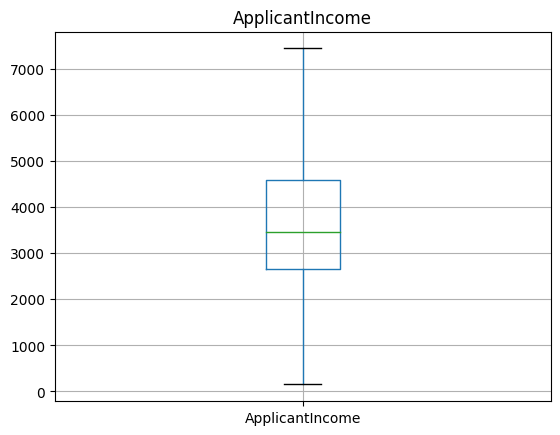

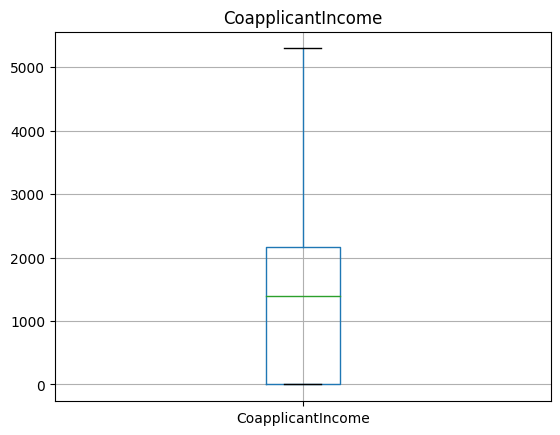

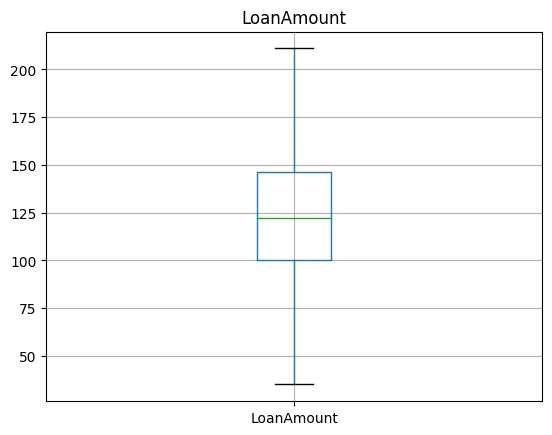

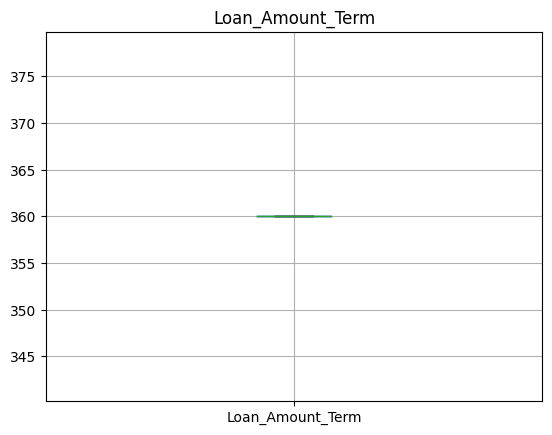

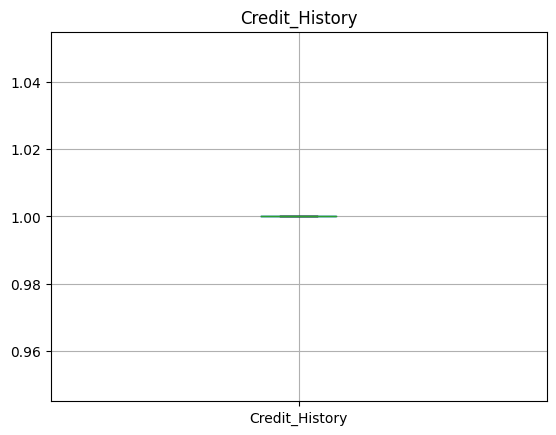

In [19]:
for column in df.select_dtypes(include=['number']):
  plt.figure()
  df.boxplot([column])
  plt.title(column)
  plt.show()


## ***Encoding categorical values***

In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

#initialising encoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Apply label encoding to each categorical column in train and test data
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


## ***Scaling Numerical Values***

In [33]:
#list of numerical columns
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

#applying scaler
scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

## ***Visualization***

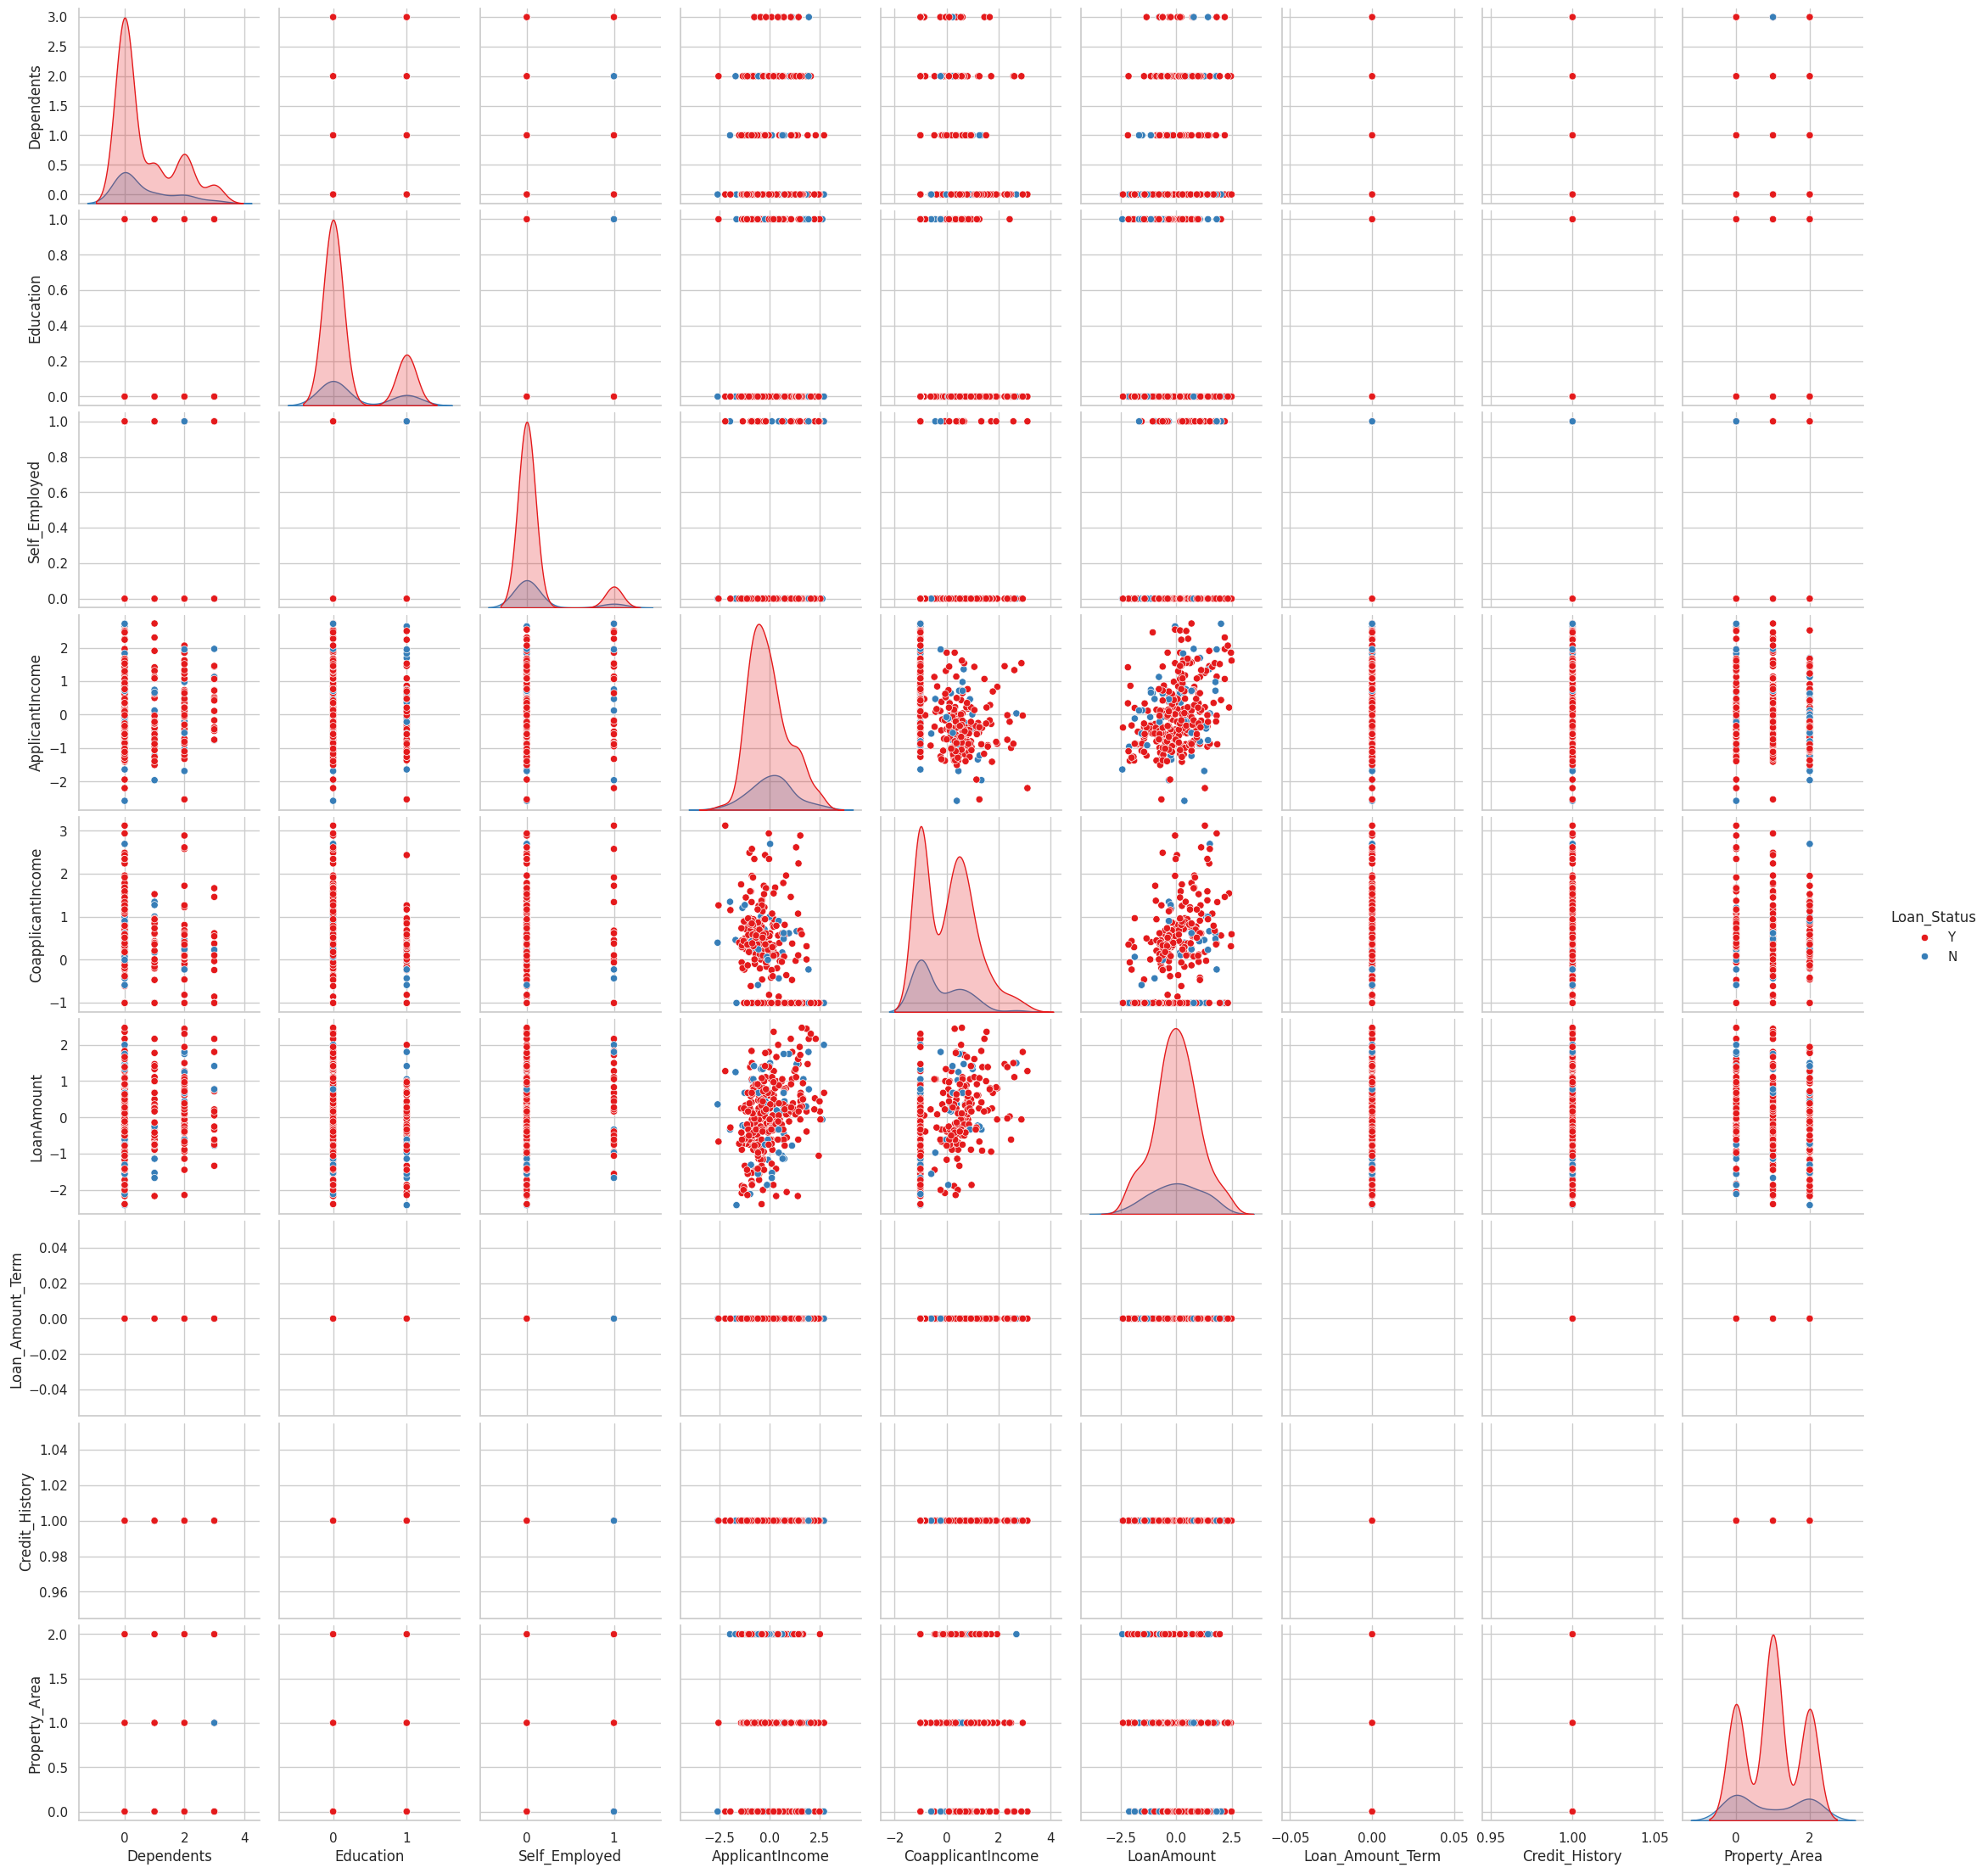

In [41]:
# Generate pair plot for numerical columns
sns.pairplot(df, hue='Loan_Status', diag_kind='kde', palette='Set1')

# Show the plot
plt.show()
